# Python Rocks!

- Oliver Will
- 2021-02-18
- v2

I can check the version of Python from within Jupyter Lab. I have 3.9 installed elsewhere on my compute. 

In [1]:
from platform import python_version
print(python_version())

3.8.5


I always check if the namespace is empty. This is a habit from R and I doubt I need to do it for Python.

In [2]:
# Not going to run
# dir()

Not quite sure what's in this namespace, but it doesn't look too bad.
## Three programming concepts
1. Variable assignment

In [3]:
# Example of variable assignment
x = 2
print(x)

# Note: Can assign different variable types in Python until you can't.
x = "Hello world"
print(x)

2
Hello world


2. Functions

In [4]:
# Example of function assignment
def f(x, y):
    ans = x+y
    return ans
print(f(2, 3))

5


Python has a method to delete variables and functions

In [5]:
del x
del f

# Not going to run dir
# dir()

3. Adding a package

In [22]:
import numpy as np
from IPython.display import HTML

# Simulate a dataset

It's easy to get into Markdown in Jupyter and it can handle $LaTex$.

We'll create our first data set of 100 data points. 

Simulate a regression of the form \begin{equation}y=\beta_0+\beta_1 x+\epsilon\end{equation}

where $\epsilon \sim \text{Normal}(0, \sigma=4)$.

Make it easy and let $\beta_0 = 5$ and $\beta_1 = 2$.

$x$ will be simulated from a $\text{Normal}(\mu = 0, \sigma = 4)$ and $\epsilon \sim \text{Normal}(\mu = 0, \sigma = 4)$.

In [6]:
# Use a legacy set seed
np.random.seed(4)
# See https://numpy.org/doc/stable/reference/random/generated/numpy.random.seed.html 
# for the modern way to set a seed.
x = np.random.normal(0, 4, 100)
print(x[:5])

[ 0.20224683  1.99980533 -3.98363572  2.77439403 -1.67320608]


In [7]:
# Add the response variable
y = 5+2*x+np.random.normal(0, 4, 100)
print(y[:5])

[ 8.3574821  11.60262359 -0.50830893 10.04251369  7.96908483]


In [9]:
# Make a dataframe
import pandas as pd
df = {'x':x
    ,'y':y}
df = pd.DataFrame(df)
print(df)
print(df.loc[:, 'x'])

           x          y
0   0.202247   8.357482
1   1.999805  11.602624
2  -3.983636  -0.508309
3   2.774394  10.042514
4  -1.673206   7.969085
..       ...        ...
95  2.092991   9.383887
96 -1.983274  -0.011796
97 -0.685858   7.135253
98 -3.777474  -4.486464
99  1.123459   3.305244

[100 rows x 2 columns]
0     0.202247
1     1.999805
2    -3.983636
3     2.774394
4    -1.673206
        ...   
95    2.092991
96   -1.983274
97   -0.685858
98   -3.777474
99    1.123459
Name: x, Length: 100, dtype: float64


## Plot the data

<AxesSubplot:xlabel='x', ylabel='y'>

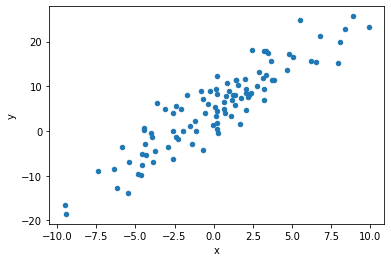

In [10]:
df.plot.scatter('x', 'y')

Maybe we need to enter the Matlibplot universe!

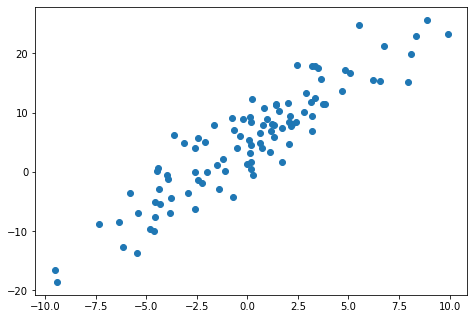

In [12]:
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(df['x'], df['y'])
plt.show()

Maybe not.

## Linear Regression
We'll fit a linear regression with OLS.

In [14]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Not happy to pull these values out into NumPy vectors
x = df.loc[:,'x'].values.reshape(-1, 1)
print("Dataframe")
print(df["x"][1:10])
print("\nNumPy")
print(x[1:10])
y = np.array(df['y']).reshape(-1, 1)

# Fit the model
regr = linear_model.LinearRegression()
regr.fit(x, y)

print("\nRegression fit")
print(regr.get_params())
print(regr.coef_)
print(regr.intercept_)

# Oh no
dir(regr)

Dataframe
1    1.999805
2   -3.983636
3    2.774394
4   -1.673206
5   -6.338309
6   -2.590827
7    2.394301
8    1.329000
9   -4.589907
Name: x, dtype: float64

NumPy
[[ 1.99980533]
 [-3.98363572]
 [ 2.77439403]
 [-1.67320608]
 [-6.33830894]
 [-2.59082707]
 [ 2.3943007 ]
 [ 1.32900013]
 [-4.58990653]]

Regression fit
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}
[[2.13124292]]
[5.06871477]


['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_residues',
 '_set_intercept',
 '_validate_data',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n_jobs',
 'normalize',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

# Plot the line
It appears LinearRegression has produced no statistics. But plotting the best fit line is easy.

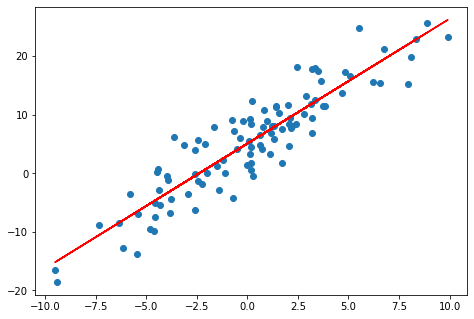

In [16]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(df['x'], df['y'])
ax.plot(x, regr.predict(x), color="red")
plt.show()

Let's get some statistics.

In [17]:
# Use statsmodels.api. Again have to use NumPy vectors
import statsmodels.api as sm
x = sm.add_constant(x)

print("Check the constant")
print(x[:][1:10])
fm = sm.OLS(y, x).fit()
print()
print(fm.summary())

Check the constant
[[ 1.          1.99980533]
 [ 1.         -3.98363572]
 [ 1.          2.77439403]
 [ 1.         -1.67320608]
 [ 1.         -6.33830894]
 [ 1.         -2.59082707]
 [ 1.          2.3943007 ]
 [ 1.          1.32900013]
 [ 1.         -4.58990653]]

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     492.0
Date:                Wed, 17 Feb 2021   Prob (F-statistic):           5.51e-40
Time:                        19:58:13   Log-Likelihood:                -272.77
No. Observations:                 100   AIC:                             549.5
Df Residuals:                      98   BIC:                             554.7
Df Model:                           1                                         
Covariance Type:         

One more time with a dataframe.

In [18]:
from statsmodels.formula.api import ols
fm = ols("y ~ x", data=df).fit()
fm_summary = fm.summary()

# Spruce it up
HTML(fm_summary.as_html())

# Regression explortion
We want to explore the regression line. 
- Means are on the regression line
- The slope is $r \times \sigma_y/\sigma_x$
- Solve for intercept

In [19]:
# Summary statistics
m_x = df["x"].mean()
m_y = df["y"].mean()

# Python is 0 indexed
b0 = fm.params[0]
b1 = fm.params[1]
print("Are the means on the line?")
print(m_y == b0+b1*m_x)

Are the means on the line?
False


In [20]:
print(m_y) 
print(b0+b1*m_x)

5.369421026342608
5.369421026342607


In [21]:
#println("\nIs the formula for the slope correct?")
print(b1)
r = df.corr().iloc[0,1]
print(r*df["y"].std()/df["x"].std())
print("\nWhat about the intercept?")
print(b0)
print(m_y-b1*m_x)

2.1312429238371906
2.1312429238371893

What about the intercept?
5.068714772521574
5.068714772521575


None of the values are equal!

# Check the model assumptions
1. Linear and additive
2. Errors are independent
3. Errors are normal
4. Errors are equal variance

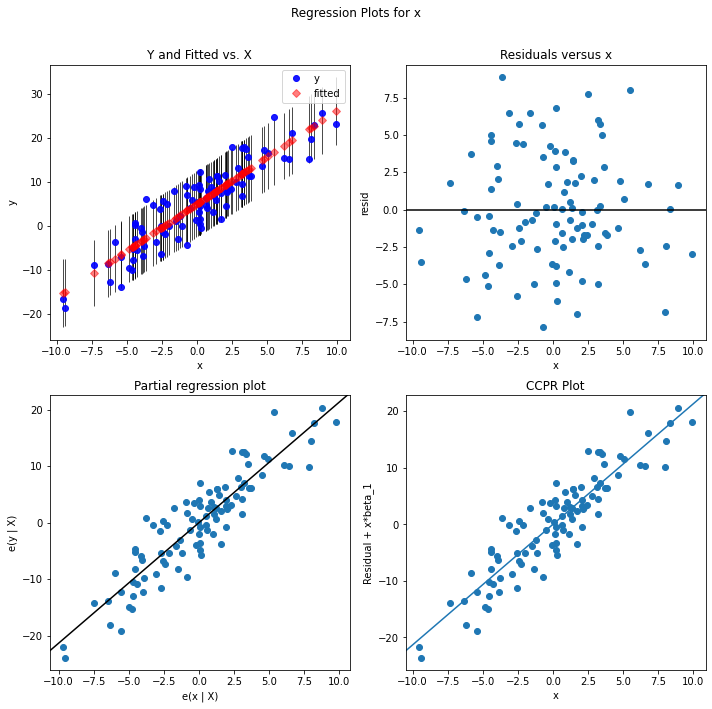

In [27]:
fig = plt.figure(figsize=(10,10))
fig = sm.graphics.plot_regress_exog(fm, "x", fig=fig)

I presented these because they're standard output. 
- "Y and fitted vs X" shows the scatter with the predicted values along with 95% confidence intervals. Looking good for normality.
- "Residuals vs X" shows that the variance is equal and independent along x.
- "Partial regression plot" shows predict y accounting for other variables. Should be the same as "Y and fitted vs X".
- "CCPR Plot" (Component and Component Plus Residual) Not quite sure.

# Final question: Did the 3 programming languages produce simulate data from the same distribution?

I find the scatter plots weird. Are these really the same distributions?

In [31]:
df.to_csv("python_simulation.csv")

In [1]:
df_R =pd.read_csv("r_simulation.csv")

NameError: name 'pd' is not defined